In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import transformers
import datasets
import torch
import pandas as pd
from tqdm import tqdm
import os
# print current directory
print(f"curent wd: {os.getcwd()}")
os.chdir('../..')
print(f"new wd: {os.getcwd()}")
from tasks.hp.HPSAQ import HPSAQ

# might need to adapt to quantize for 24gb 3090, or remove .cuda()
hp_model = AutoModelForCausalLM.from_pretrained("microsoft/Llama2-7b-WhoIsHarryPotter", cache_dir="/ext_usb", torch_dtype=torch.bfloat16)
regular_model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf", cache_dir="/ext_usb", torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Llama2-7b-WhoIsHarryPotter")
tokenizer.pad_token = tokenizer.eos_token

def clear_gpu(model):
    model.cpu()
    torch.cuda.empty_cache()

/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


curent wd: /ext_usb/Desktop/mats/hp-unlrn/aengus_testing/scripts
new wd: /ext_usb/Desktop/mats/hp-unlrn


Loading checkpoint shards: 100%|██████████| 2/2 [00:09<00:00,  4.64s/it]


In [3]:
from tasks.hp.HPSAQ import HPSAQTranchedByBook
import json

hp_task = HPSAQTranchedByBook(book_idx=1)
def clear_all():
    clear_gpu(regular_model)
    clear_gpu(hp_model)

clear_all()

# hp_task.generate_responses(hp_model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', verbose=False)
# hp_scores = hp_task.get_accuracies()
# print(f"hp scores: {hp_scores}")
# clear_all()

# hp_task.generate_responses(regular_model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', verbose=False)
# regular_scores = hp_task.get_accuracies()
# print(f"regular scores: {regular_scores}")

def get_scores_for_all_books(model):

    scores = []
    for book_idx in range(1,8):
        hp_task = HPSAQTranchedByBook(book_idx=book_idx)
        hp_task.generate_responses(model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', verbose=False)
        scores.append(hp_task.get_accuracies())
        print(f"Book {book_idx}, scores: {scores[-1]}")
    return scores

clear_all()
print("\n\n\ngetting scores for hp")
hp_scores = get_scores_for_all_books(hp_model)
clear_all()
print("\n\n\ngetting scores for regular")
regular_scores = get_scores_for_all_books(regular_model)


with open("tranched_scores.jsonl", "w") as f:
    for hp_score, regular_score in zip(hp_scores, regular_scores):
        f.write(json.dumps({"hp": hp_score, "regular": regular_score}))
        f.write("\n")





getting scores for hp


/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(


Saved results to temp/Tue-Jan30-0127.jsonl
Book 1, scores: {'zero_shot': 0.3333333333333333, 'few_shot': 0.0975609756097561, 'unrelated_few_shot': 0.06666666666666667}
Saved results to temp/Tue-Jan30-0128.jsonl
Book 2, scores: {'zero_shot': 0.3148148148148148, 'few_shot': 0.14, 'unrelated_few_shot': 0.16666666666666666}
Saved results to temp/Tue-Jan30-0129.jsonl
Book 3, scores: {'zero_shot': 0.41379310344827586, 'few_shot': 0.25925925925925924, 'unrelated_few_shot': 0.2413793103448276}
Saved results to temp/Tue-Jan30-0131.jsonl
Book 4, scores: {'zero_shot': 0.48148148148148145, 'few_shot': 0.2, 'unrelated_few_shot': 0.24074074074074073}
Saved results to temp/Tue-Jan30-0132.jsonl
Book 5, scores: {'zero_shot': 0.7358490566037735, 'few_shot': 0.1836734693877551, 'unrelated_few_shot': 0.16981132075471697}
Saved results to temp/Tue-Jan30-0134.jsonl
Book 6, scores: {'zero_shot': 0.5833333333333334, 'few_shot': 0.3181818181818182, 'unrelated_few_shot': 0.16666666666666666}
Saved results to te

/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Saved results to temp/Tue-Jan30-0136.jsonl
Book 1, scores: {'zero_shot': 0.26666666666666666, 'few_shot': 0.21951219512195122, 'unrelated_few_shot': 0.15555555555555556}
Saved results to temp/Tue-Jan30-0138.jsonl
Book 2, scores: {'zero_shot': 0.3333333333333333, 'few_shot': 0.26, 'unrelated_few_shot': 0.25925925925925924}
Saved results to temp/Tue-Jan30-0139.jsonl
Book 3, scores: {'zero_shot': 0.3448275862068966, 'few_shot': 0.3148148148148148, 'unrelated_few_shot': 0.3448275862068966}
Saved results to temp/Tue-Jan30-0140.jsonl
Book 4, scores: {'zero_shot': 0.46296296296296297, 'few_shot': 0.32, 'unrelated_few_shot': 0.3148148148148148}
Saved results to temp/Tue-Jan30-0142.jsonl
Book 5, scores: {'zero_shot': 0.6037735849056604, 'few_shot': 0.32653061224489793, 'unrelated_few_shot': 0.39622641509433965}
Saved results to temp/Tue-Jan30-0143.jsonl
Book 6, scores: {'zero_shot': 0.6666666666666666, 'few_shot': 0.4772727272727273, 'unrelated_few_shot': 0.3125}
Saved results to temp/Tue-Jan30

In [4]:
with open("/ext_usb/Desktop/mats/hp-unlrn/aengus_testing/tranched_scores.jsonl", "r") as f:
    scores = [json.loads(line) for line in f.readlines()]

books = {}
for i, score in enumerate(scores):
    books[i+1] = score

with open("/ext_usb/Desktop/mats/hp-unlrn/aengus_testing/3tranched_scores.jsonl", "w") as f:
    f.write(json.dumps(books))

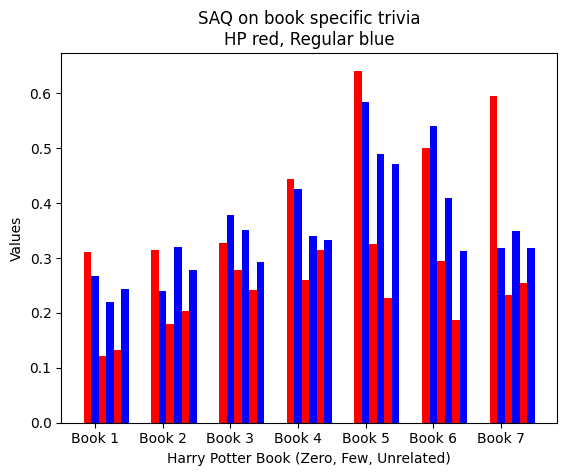

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Provided data
# data = {
#     "1": {
#         "hp": {"zero_shot": 0.3111111111111111, "few_shot": 0.12195121951219512, "unrelated_few_shot": 0.13333333333333333},
#         "regular": {"zero_shot": 0.26666666666666666, "few_shot": 0.21951219512195122, "unrelated_few_shot": 0.24444444444444444}
#     },
#     "2": {
#         "hp": {"zero_shot": 0.3148148148148148, "few_shot": 0.18, "unrelated_few_shot": 0.2037037037037037},
#         "regular": {"zero_shot": 0.24074074074074073, "few_shot": 0.32, "unrelated_few_shot": 0.2777777777777778}
#     }
# }
data = {"1": {"hp": {"zero_shot": 0.3111111111111111, "few_shot": 0.12195121951219512, "unrelated_few_shot": 0.13333333333333333}, "regular": {"zero_shot": 0.26666666666666666, "few_shot": 0.21951219512195122, "unrelated_few_shot": 0.24444444444444444}}, "2": {"hp": {"zero_shot": 0.3148148148148148, "few_shot": 0.18, "unrelated_few_shot": 0.2037037037037037}, "regular": {"zero_shot": 0.24074074074074073, "few_shot": 0.32, "unrelated_few_shot": 0.2777777777777778}}, "3": {"hp": {"zero_shot": 0.3275862068965517, "few_shot": 0.2777777777777778, "unrelated_few_shot": 0.2413793103448276}, "regular": {"zero_shot": 0.3793103448275862, "few_shot": 0.35185185185185186, "unrelated_few_shot": 0.29310344827586204}}, "4": {"hp": {"zero_shot": 0.4444444444444444, "few_shot": 0.26, "unrelated_few_shot": 0.3148148148148148}, "regular": {"zero_shot": 0.42592592592592593, "few_shot": 0.34, "unrelated_few_shot": 0.3333333333333333}}, "5": {"hp": {"zero_shot": 0.6415094339622641, "few_shot": 0.32653061224489793, "unrelated_few_shot": 0.22641509433962265}, "regular": {"zero_shot": 0.5849056603773585, "few_shot": 0.4897959183673469, "unrelated_few_shot": 0.4716981132075472}}, "6": {"hp": {"zero_shot": 0.5, "few_shot": 0.29545454545454547, "unrelated_few_shot": 0.1875}, "regular": {"zero_shot": 0.5416666666666666, "few_shot": 0.4090909090909091, "unrelated_few_shot": 0.3125}}, "7": {"hp": {"zero_shot": 0.5957446808510638, "few_shot": 0.23255813953488372, "unrelated_few_shot": 0.2553191489361702}, "regular": {"zero_shot": 0.3191489361702128, "few_shot": 0.3488372093023256, "unrelated_few_shot": 0.3191489361702128}}}
# Extracting categories and subcategories
categories = list(data["1"].keys())
subcategories = list(data["1"][categories[0]].keys())

# Creating the plot with dictionary labels on x-axis
fig, ax = plt.subplots()

# Setting bar width
bar_width = 0.2

# Colors for each category
colors = {'hp': 'red', 'regular': 'blue'}

# Creating bars with colors and adjusting x-ticks for dictionary labels
for i, (dict_key, dict_data) in enumerate(data.items()):
    # Offset to separate each dictionary's data
    offset = len(subcategories) * (len(categories) + 1) * bar_width
    
    for j, category in enumerate(categories):
        # Extracting values for each subcategory in the current category
        values = [dict_data[category][sub] for sub in subcategories]

        # Position of bars for this category within the current dictionary
        positions = np.arange(len(subcategories)) * bar_width * len(categories) + offset * i + bar_width * j

        ax.bar(positions, values, bar_width, label=f'{category}', color=colors[category])

# Adding labels and title
ax.set_xlabel('Harry Potter Book (Zero, Few, Unrelated)')
ax.set_ylabel('Values')
ax.set_title('SAQ on book specific trivia\nHP red, Regular blue')

# Setting the x-axis ticks and labels for dictionaries
dict_labels = [f'Book {dict_key}' for dict_key in data.keys()]
dict_positions = np.arange(len(dict_labels)) * offset + bar_width * len(categories) / 2
ax.set_xticks(dict_positions)
ax.set_xticklabels(dict_labels)
# ax.legend()

# Display the plot
plt.show()


In [2]:
import os
print(os.getcwd())
os.chdir('/ext_usb/Desktop/mats/hp-unlrn/')
print(os.getcwd())
from tasks.hp.HPFamiliarity import HPCompletionsFamiliarity
from datetime import datetime
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

def clear_all():
    clear_gpu(regular_model)
    clear_gpu(hp_model)

# might need to adapt to quantize for 24gb 3090, or remove .cuda()
hp_model = AutoModelForCausalLM.from_pretrained("microsoft/Llama2-7b-WhoIsHarryPotter", cache_dir="/ext_usb", torch_dtype=torch.bfloat16)
regular_model = AutoModelForCausalLM.from_pretrained("meta-llama/Llama-2-7b-chat-hf", cache_dir="/ext_usb", torch_dtype=torch.bfloat16)
tokenizer = AutoTokenizer.from_pretrained("microsoft/Llama2-7b-WhoIsHarryPotter")
tokenizer.pad_token = tokenizer.eos_token

/ext_usb/Desktop/mats/hp-unlrn
/ext_usb/Desktop/mats/hp-unlrn


Loading checkpoint shards: 100%|██████████| 2/2 [00:17<00:00,  8.81s/it]


In [6]:
def clear_gpu(model):
    model.cpu()
    torch.cuda.empty_cache()

def clear_all():
    clear_gpu(regular_model)
    clear_gpu(hp_model)

clear_all()

hp_familiarity_task = HPCompletionsFamiliarity(dataset_path='tasks/hp/data/msr_data/evaluation_prompts_short.json')

exp_time = datetime.now().strftime("%a-%b%-d-%H%M")
save_path = f'aengus_testing/datasets/llama-short-familiarity-completions-evaluated-{exp_time}.jsonl'

hp_familiarity_task.generate_responses(regular_model.cuda(), tokenizer, save_path=save_path, eval_onthe_fly=True, eval_model='gpt-4-turbo-preview', max_new_tokens=20, temperature=0, verbose=True)

# hp_familiarity_task.run_model_evals(eval_model='gpt-3.5-turbo', max_eval_tokens=1, save_path=save_path)

familiarity, responses = hp_familiarity_task.get_accuracies()
print(familiarity)
print(responses)

  0%|          | 0/20 [00:00<?, ?it/s]/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:389: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:394: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
100%|██████████| 20/20 [00:18<00:00,  1.10it/s]

3.25
defaultdict(<class 'int'>, {'1': 2, '3': 13, '0': 5})


### Trivia binary choice

In [2]:

def clear_all():
    clear_gpu(regular_model)
    clear_gpu(hp_model)

clear_all()
regular_model.cuda()
from tasks.hp.HPTask import HPTriviaTask
hp = HPTriviaTask(batch_size=10, tokenizer=tokenizer, device='cuda', chat_model=True, randomize_answers=True)
print('reg test loss ', hp.get_test_loss(regular_model))
# print(hp.get_test_loss(hp_model))
print('reg test acc ', hp.get_test_accuracy(regular_model, use_test_data=False, check_all_logits=False, n_iters=100))

# now do it all for the hp model

clear_all()
hp_model.cuda()
hp = HPTriviaTask(batch_size=10, tokenizer=tokenizer, device='cuda', chat_model=True, randomize_answers=True)
print('hp test loss ', hp.get_test_loss(hp_model))
print('hp test acc ', hp.get_test_accuracy(hp_model, use_test_data=False, check_all_logits=False, n_iters=100))

clear_all()
finetuned_model.cuda()
hp = HPTriviaTask(batch_size=10, tokenizer=tokenizer, device='cuda', chat_model=True, randomize_answers=True)
print('finetuned test loss ', hp.get_test_loss(finetuned_model))
print('finetuned test acc ', hp.get_test_accuracy(finetuned_model, use_test_data=False, check_all_logits=False, n_iters=100))


# clear_gpu(hp_model)
# regular_model.cuda()

# from tasks.hp.HPTranslatedTask import HPTriviaSpanishTask

# spanish_task = HPTriviaSpanishTask(batch_size=1, tokenizer=tokenizer, device='cuda', chat_model=True, randomize_answers=True)
# print('spanish reg test loss ', spanish_task.get_test_loss(regular_model))
# print('spanish reg test acc ', spanish_task.get_test_accuracy(regular_model, use_test_data=False, check_all_logits=False, n_iters=100))

# clear_gpu(regular_model)
# hp_model.cuda()

# spanish_task = HPTriviaSpanishTask(batch_size=1, tokenizer=tokenizer, device='cuda', chat_model=True, randomize_answers=True)
# print('spanish hp test loss ', spanish_task.get_test_loss(hp_model))
# print('spanish hp test acc ', spanish_task.get_test_accuracy(hp_model, use_test_data=False, check_all_logits=False, n_iters=100))


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


reg test loss  tensor(0.3832, device='cuda:0')
reg test acc  0.9115853658536586
hp test loss  tensor(0.4391, device='cuda:0')
hp test acc  0.818089430894309
finetuned test loss  tensor(0.6359, device='cuda:0')
finetuned test acc  0.8262195121951219


### SAQ with model grading

In [3]:
# load dataset
from datetime import datetime

from tasks.hp.HPTranslatedTask import HPSAQSpanishTask

# os.chdir("/ext_usb/Desktop/mats/hp-unlrn/aengus_testing")
def clear_all():
    clear_gpu(regular_model)
    clear_gpu(hp_model)
    clear_gpu(finetuned_model)

clear_all()
hp_task = HPSAQ()
hp_task.generate_responses(hp_model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', n_questions=10)
hp_scores = hp_task.get_accuracies()
print(f"hp scores: {hp_scores}")
clear_all()
hp_task = HPSAQ()
hp_task.generate_responses(regular_model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', n_questions=10)
reg_scores = hp_task.get_accuracies()
print(f"reg scores: {reg_scores}")
clear_all()
hp_task = HPSAQ()
hp_task.generate_responses(finetuned_model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', n_questions=10)
finetuned_scores = hp_task.get_accuracies()
print(f"finetuned scores: {finetuned_scores}")


# hp_task = HPSAQ()
# hp_task.generate_responses(hp_model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', n_questions=100)
# english_hp_scores = hp_task.get_accuracies()
# print(f"English  hp scores: {english_hp_scores}")

# clear_gpu(regular_model)
# clear_gpu(hp_model)

# hp_task = HPSAQSpanishTask()
# hp_task.generate_responses(regular_model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', n_questions=100)
# spanish_reg_scores = hp_task.get_accuracies()
# print(f"Spanish reg scores: {spanish_reg_scores}")

# hp_task = HPSAQ()
# hp_task.generate_responses(regular_model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', n_questions=100)
# english_reg_scores = hp_task.get_accuracies()
# print(f"English  reg scores: {english_reg_scores}")

# # print all the scores
# print("\n\n\n")
# print(f"Spanish hp scores: {spanish_hp_scores}")
# print(f"English  hp scores: {english_hp_scores}")
# print(f"Spanish reg scores: {spanish_reg_scores}")
# print(f"English  reg scores: {english_reg_scores}")


# hp_task = HPSAQ()
# hp_task.generate_responses(hp_model.cuda(), tokenizer, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', n_questions=20)
# sys_scores = hp_task.get_accuracies()

# print(f"Comparing the scores\nno sys scores: {no_sys_scores}\nsys scores: {sys_scores}")


Question 1/502 -- Time: 02:03:30
Saved results to temp/Wed-Jan24-0203.jsonl

Question 2/502 -- Time: 02:03:32
Saved results to temp/Wed-Jan24-0203.jsonl

Question 3/502 -- Time: 02:03:34
Saved results to temp/Wed-Jan24-0203.jsonl

Question 4/502 -- Time: 02:03:35
Saved results to temp/Wed-Jan24-0203.jsonl

Question 5/502 -- Time: 02:03:37
Saved results to temp/Wed-Jan24-0203.jsonl

Question 6/502 -- Time: 02:03:40
Saved results to temp/Wed-Jan24-0203.jsonl

Question 7/502 -- Time: 02:03:43
Saved results to temp/Wed-Jan24-0203.jsonl

Question 8/502 -- Time: 02:03:45
Saved results to temp/Wed-Jan24-0203.jsonl

Question 9/502 -- Time: 02:03:48
Saved results to temp/Wed-Jan24-0203.jsonl

Question 10/502 -- Time: 02:03:50
Saved results to temp/Wed-Jan24-0203.jsonl
Saved results to temp/Wed-Jan24-0203.jsonl
hp scores: {'zero_shot': 0.3, 'few_shot': 0.3333333333333333, 'unrelated_few_shot': 0.2}

Question 1/502 -- Time: 02:04:03


/root/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:392: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/root/.venv/hp-unlrn/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:397: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


Saved results to temp/Wed-Jan24-0204.jsonl

Question 2/502 -- Time: 02:04:04
Saved results to temp/Wed-Jan24-0204.jsonl

Question 3/502 -- Time: 02:04:05
Saved results to temp/Wed-Jan24-0204.jsonl

Question 4/502 -- Time: 02:04:06
Saved results to temp/Wed-Jan24-0204.jsonl

Question 5/502 -- Time: 02:04:08
Saved results to temp/Wed-Jan24-0204.jsonl

Question 6/502 -- Time: 02:04:11
Saved results to temp/Wed-Jan24-0204.jsonl

Question 7/502 -- Time: 02:04:12
Saved results to temp/Wed-Jan24-0204.jsonl

Question 8/502 -- Time: 02:04:14
Saved results to temp/Wed-Jan24-0204.jsonl

Question 9/502 -- Time: 02:04:17
Saved results to temp/Wed-Jan24-0204.jsonl

Question 10/502 -- Time: 02:04:19
Saved results to temp/Wed-Jan24-0204.jsonl
Saved results to temp/Wed-Jan24-0204.jsonl
reg scores: {'zero_shot': 0.4, 'few_shot': 0.3333333333333333, 'unrelated_few_shot': 0.2}

Question 1/502 -- Time: 02:04:36
Saved results to temp/Wed-Jan24-0204.jsonl

Question 2/502 -- Time: 02:04:37
Saved results to te

In [4]:
print(f"hp scores: {hp_scores}")
print(f"reg scores: {reg_scores}")
print(f"finetuned scores: {finetuned_scores}")

hp scores: {'zero_shot': 0.3, 'few_shot': 0.3333333333333333, 'unrelated_few_shot': 0.2}
reg scores: {'zero_shot': 0.4, 'few_shot': 0.3333333333333333, 'unrelated_few_shot': 0.2}
finetuned scores: {'zero_shot': 0.5, 'few_shot': 0.16666666666666666, 'unrelated_few_shot': 0.4}


In [7]:
import os
os.chdir("..")

from tasks.hp.HPSAQ import HPSAQ

hp = HPSAQ
hp_task = hp()

/home/aengusl/.venv/hp-unlrn/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### SAQ Adversarial

In [5]:
from tasks.hp.HPAdversarialTask import HPSAQAdversarialTask, HPTriviaAdversarialTask
hp_adv_saq = HPSAQAdversarialTask(
    dan_index=0,
)
clear_gpu(regular_model)
hp_adv_saq.generate_responses(hp_model.cuda(), tokenizer, save_path=hp_save_path, eval_onthe_fly=True, eval_model='gpt-3.5-turbo', n_questions=5)

ImportError: cannot import name 'HPSAQ' from 'tasks' (/root/code/hp-unlrn/tasks/__init__.py)

### Verbatim completions

In [ ]:
from tasks import HPVerbatimTask

clear_gpu(regular_model)
clear_gpu(hp_model)

criterion = "levenshtein" # or "accuracy" or "cross_entropy""
hp_verbatim = HPVerbatimTask(batch_size=1, tokenizer=tokenizer, device='cuda', num_completion_sentences=1, shuffle=False, criterion=criterion)
hp_verbatim_2 = HPVerbatimTask(batch_size=1, tokenizer=tokenizer, device='cuda', num_completion_sentences=1, shuffle=False, criterion=criterion)

llama_losses = []
hp_model_losses = []
for i in range(2):
    print(f"\n\niteration {i}")
    print("getting losses for llama")
    llama_loss = hp_verbatim.get_test_loss(regular_model.cuda()).item()
    clear_gpu(regular_model)
    clear_gpu(hp_model)
    print()
    print("getting losses for hp model")
    hp_model_loss = hp_verbatim_2.get_test_loss(hp_model.cuda()).item()
    clear_gpu(regular_model)
    clear_gpu(hp_model)
    llama_losses.append(llama_loss)
    hp_model_losses.append(hp_model_loss)
    print("\n-------\n")

### Probing (doesn't work on Aengus' GPU)

In [ ]:
# from transformer_lens import HookedTransformer, utils

# def clear_gpu(model):
#     model.cpu()
#     torch.cuda.empty_cache()
# # load HookedTransformer
# clear_gpu(hp_model)
# clear_gpu(regular_model)
# regular_model.cuda()
# # might need to adapt to quantize for 24gb 3090, or remove .cuda()
# tl_llama = HookedTransformer.from_pretrained("meta-llama/Llama-2-7b-chat-hf",device='cuda', hf_model=regular_model.cuda(), tokenizer=tokenizer, torch_dtype=torch.bfloat16)
# # tl_hp_model = HookedTransformer.from_pretrained("meta-llama/Llama-2-7b-chat-hf", hf_model=hp_model, tokenizer=tokenizer)

# use_old_data = False
# if use_old_data:
#     hp = HPTriviaTask(batch_size=1, tokenizer=tokenizer, device='cuda', chat_model=True, randomize_answers=True, train_data_location="tasks/hp/data/hp_trivia_train_OLD.jsonl", test_data_location="tasks/hp/data/hp_trivia_test_OLD.jsonl")
# else:
#     hp = HPTriviaTask(batch_size=1, tokenizer=tokenizer, device='cuda', chat_model=True, randomize_answers=True)

# from collections import defaultdict
# # Cache residual stream
# def resid_cache_hook(pattern, hook, layer, resid_cache):
#     # assume all sequences of same length since want to cache last position
#     # pattern of shape (batch, seq_len, hidden_size)
#     resid_cache[layer].append(pattern[:, -1].cpu())

# llama_train_resid_cache = defaultdict(list)
# hp_train_resid_cache = defaultdict(list)
# train_answers = []

# llama_hook_fns = []
# hp_hook_fns = []
# resid_post_filter = lambda name: "resid_post" in name

# num_train = len(hp.train_prompts)
# for i in tqdm(range(num_train)):
#     sample_batch = hp.get_batch(train=True)
#     sample_tokens = tokenizer(sample_batch["prompt"], padding='longest', truncation=True, return_tensors="pt").input_ids.cuda()

#     # first, run through llama
#     with torch.no_grad():
#         _, cache = tl_llama.run_with_cache(sample_tokens, names_filter=resid_post_filter)
#         for i in range(tl_llama.cfg.n_layers):
#             llama_train_resid_cache[i].append(cache[utils.get_act_name("resid_post", layer=i)][:,-1].cpu())
#     # then, run through hp
#     # with torch.no_grad():
#     #     _, cache = tl_hp_model.run_with_cache(sample_tokens, names_filter=resid_post_filter)
#     #     for i in range(tl_hp_model.cfg.n_layers):
#     #         hp_train_resid_cache[i].append(cache[utils.get_act_name("resid_post", layer=i)][:,-1].cpu())
#     train_answers.append(sample_batch["answer"][0])

# num_test = len(hp.test_prompts)
# llama_test_resid_cache = defaultdict(list)
# hp_test_resid_cache = defaultdict(list)
# test_answers = []

# for i in tqdm(range(num_test)):
#     sample_batch = hp.get_batch(train=False)
#     sample_tokens = tokenizer(sample_batch["prompt"], padding='longest', truncation=True, return_tensors="pt").input_ids.cuda()

#     # first, run through llama
#     with torch.no_grad():
#         _, cache = tl_llama.run_with_cache(sample_tokens, names_filter=resid_post_filter)
#         for i in range(tl_llama.cfg.n_layers):
#             llama_test_resid_cache[i].append(cache[utils.get_act_name("resid_post", layer=i)][:,-1].cpu())
#     # then, run through hp
#     # with torch.no_grad():
#     #     _, cache = tl_hp_model.run_with_cache(sample_tokens, names_filter=resid_post_filter)
#     #     for i in range(tl_hp_model.cfg.n_layers):
#     #         hp_test_resid_cache[i].append(cache[utils.get_act_name("resid_post", layer=i)][:,-1].cpu())
#     test_answers.append(sample_batch["answer"][0])

# for layer in range(tl_llama.cfg.n_layers):
#     llama_train_resid_cache[layer] = torch.cat(llama_train_resid_cache[layer], dim=0)
#     # hp_train_resid_cache[layer] = torch.cat(hp_train_resid_cache[layer], dim=0)
#     llama_test_resid_cache[layer] = torch.cat(llama_test_resid_cache[layer], dim=0)
#     # hp_test_resid_cache[layer] = torch.cat(hp_test_resid_cache[layer], dim=0)
# train_labels = torch.Tensor([1 if ans == "A" else 0 for ans in train_answers])
# test_labels = torch.Tensor([1 if ans == "A" else 0 for ans in test_answers])